# Working on a real dataset for Regression Problem using Neural Networks
Medical Cost Personal Datasets

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [4]:
## One Hot Encode

insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
# Create X and Y values ( Features and Labels )
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
# Creating training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [10]:
# Build a Neural Network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8629.2959 - mse: 187828496.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7789.1929 - mse: 168075776.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7590.6167 - mse: 162955664.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.8672 - mse: 166325392.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7801.3599 - mse: 166567328.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.0039 - mse: 162655392.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.0435 - mse: 166338096.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.6470 - mse: 162614688.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.2803 - mse: 162046304.0000
Epoch 10/100
34/34 [==============================] - 0

In [11]:
# Check the result of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7068.4258 - mse: 111068048.0000


[7068.42578125, 111068048.0]

# Try improve our model

## 1. Add an extra layer with more hidden units and add Adam optimizer

In [14]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [17]:
# Evaluate model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4859.1396 - mae: 4859.1396


[4859.1396484375, 4859.1396484375]

In [18]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 7068.4258 - mse: 111068048.0000


[7068.42578125, 111068048.0]

## 2. Same model but run for 200 epochs

In [19]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 100, verbose = 0)

In [20]:
# Evaluate the model3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4955.6221 - mae: 4955.6221


[4955.6220703125, 4955.6220703125]

Text(0.5, 0, 'epochs')

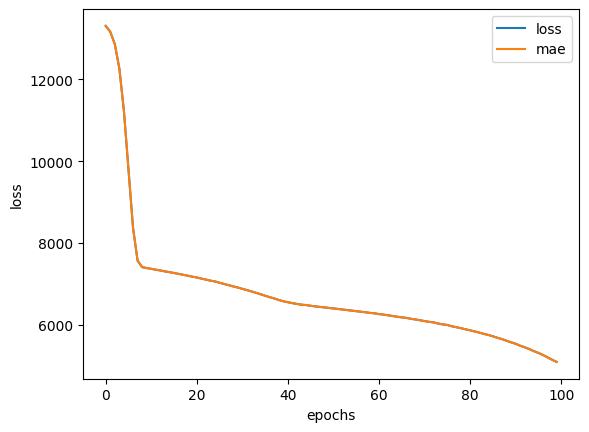

In [21]:
# Plot history also known as loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Earlystopping callback is a tensorflow component which we can add to our model to stop training when there is no further improvement

# Another way of Data Preprocessing ( Normalization and Standardization )

<Axes: ylabel='Frequency'>

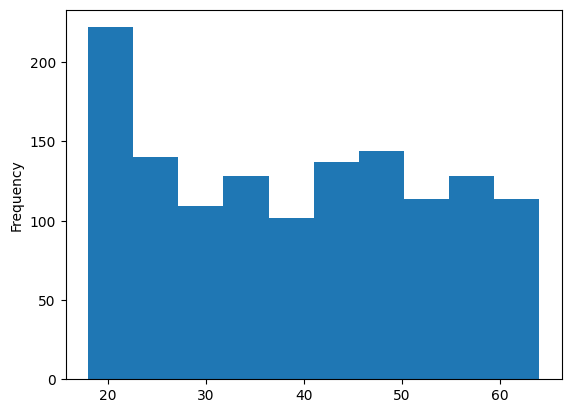

In [22]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

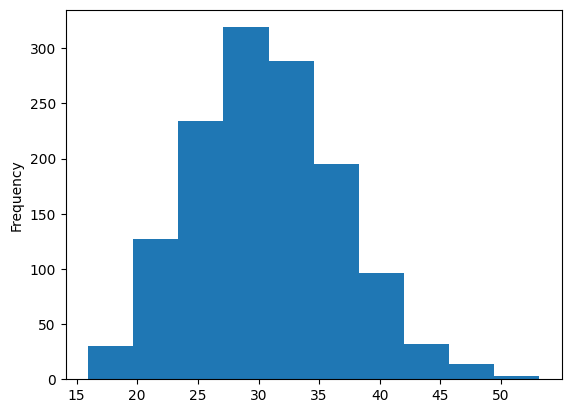

In [24]:
X["bmi"].plot(kind="hist")

In [25]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [27]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

## Prepare data using sklearn

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our data ( Training ) : use this fit data using training data to transform train and test.
ct.fit(X_train)

# Transform training and test data with normalization and onehotencoder
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)




In [29]:
# lets visualize our data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [31]:
X_train_norm[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

## Build a neural network for new data

In [33]:
# Random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_final.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit the model
history = insurance_model_final.fit(X_train_norm, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13344.3369 - mae: 13344.3369
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13337.6807 - mae: 13337.6807
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13320.5898 - mae: 13320.5898
Epoch 4/100
34/34 [==============================] - 0s 10ms/step - loss: 13283.3574 - mae: 13283.3574
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13215.0850 - mae: 13215.0850
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.5518 - mae: 13104.5518
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 12941.1045 - mae: 12941.1045
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 12714.3301 - mae: 12714.3301
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12413.7275 - mae: 12413.7275
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 12032.4

In [35]:
# Evaluate the final model
insurance_model_final.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3443.8745 - mae: 3443.8745


[3443.87451171875, 3443.87451171875]

Text(0, 0.5, 'Loss')

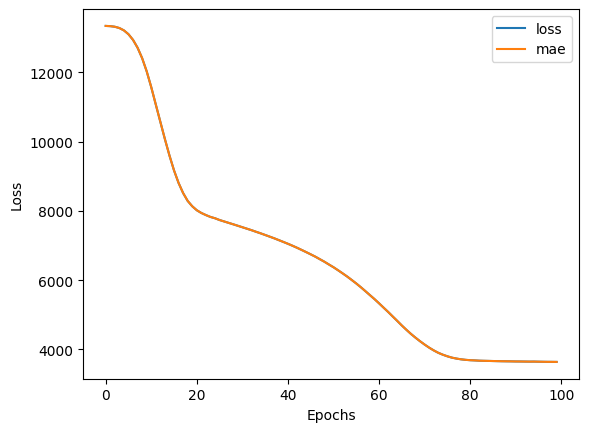

In [38]:
# Plotting the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")